#  Real Estate Price Predictor 


In [1]:
import pandas as pd 

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285747,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705466,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline 

In [8]:
import matplotlib.pyplot as plt 

## Train-Test Spliting 

In [9]:

import numpy as np 

def split_train_test(data,test_ratio):
    shuffled= np.random.permutation(len(data))
    test_set_size=int (len(data)* test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[:test_set_size]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
# train_set,test_set= split_train_test(housing,0.2)

In [11]:
# print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}")

Rows in train set:404
 Rows in test set:102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
housing=strat_train_set.copy()

# Looking for Corelations 

In [17]:
corr_matrix=housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False) # meaing of 1 is strong positive correlations 

MEDV       1.000000
RM         0.679718
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

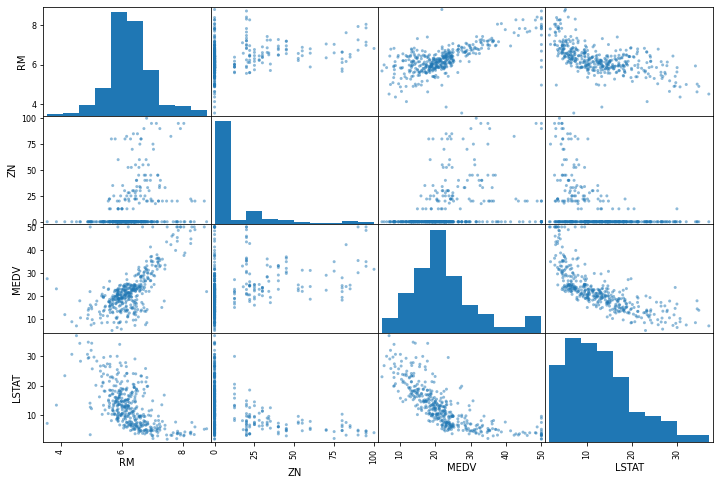

In [19]:
from pandas.plotting import scatter_matrix
attributes= ["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

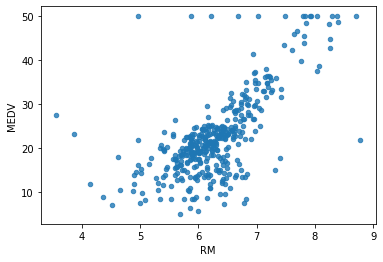

In [20]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# Trying Out Attribute Contribution 

In [21]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679718
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.529560
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

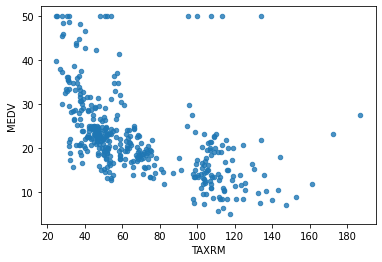

In [24]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [25]:
housing= strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# Missing Attributes 

In [26]:
# set the value to some value 

In [27]:
a=housing.dropna(subset=['RM'])  # option1
a.shape

(400, 13)

In [28]:
housing.drop("RM",axis=1).shape # option 2 
# look here there is no RM coloumn and also orignal housing data frame remain unchage 

(404, 12)

In [29]:
median = housing["RM"].median()

In [30]:
housing["RM"].fillna(median)  # orignal data frame is unchnaged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe() # before we started filling missing attributes 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282360,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716094,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_.shape

(13,)

In [35]:
X = imputer.transform(housing)

In [36]:
housing_tr=pd.DataFrame(X, columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281718,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712561,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

1. Estimaterrs  Estimates some parameter based on a data set  eg. Imuter 
It has a fit method and transform method.
Fit method_ Fits the dataset and calculates internal parmeters 

2. Transformers-- transform method takes inout and returns output based on the learnings from fit(). It also has a convinience function called fit_transform()which fits transforms
 
3. Predictors -- LinearRegression model is an example of predictor. fit() and predict are to common functions It also gives score function which will wvaluate the function 

# Creating a Pipeline

In [38]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    # add as many as you want 
    
    ('std_scaler',StandardScaler()),
])

In [39]:
housing_num_tr= my_pipeline.fit_transform(housing)

In [40]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
# model=LinearRegression()
model= DecisionTreeRegressor()
# model= RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [42]:
some_data = housing.iloc[:5]

In [43]:
some_labels= housing_labels.iloc[:5]

In [44]:
prepared_data= my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [46]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions= model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions) 
rmse=np.sqrt(mse)

In [48]:
rmse

0.0

# Using better evaluation techniques - Cross Validation 

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores= np.sqrt(-scores)

In [50]:
rmse_scores

array([4.07897644, 5.64861304, 5.35648684, 3.92990411, 4.16136997,
       3.01989238, 4.79833304, 3.92711726, 3.3925654 , 4.41885166])

In [51]:
def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standred deviation",scores.std())

In [52]:
print_scores(rmse_scores)

Scores [4.07897644 5.64861304 5.35648684 3.92990411 4.16136997 3.01989238
 4.79833304 3.92711726 3.3925654  4.41885166]
Mean 4.2732110144180515
Standred deviation 0.7743643762673045


# Saving the model 

In [53]:
from joblib import dump,load 
dump(model,'Dragon.joblib')

['Dragon.joblib']

# Testing the model on test data 

In [54]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test= strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[28.4 11.9 29.4 26.4 19.7 13.8 22.4 11.3 41.3 43.8 22.4 11.9 21.6 19.6
 19.  11.5 32.7 15.2 24.2 17.8 18.5 14.5 10.9 21.7 16.1 31.6 17.1 33.1
 10.2 32.7 19.3 20.6 21.4 10.9 22.3  8.3 48.8 25.3 20.7 45.4 22.9 26.4
 19.6 22.  14.5 33.2 48.3 20.6 20.6 22.2 24.5 13.1 22.4 17.1 28.6 31.7
 37.6 30.8 19.4 19.9 50.   6.3 17.5 22.6 18.1 28.7 17.4 13.4 19.9 36.4
 24.3 22.6 19.3 21.2 32.7 12.7 15.6 18.2 20.6 20.3 22.9 19.9 13.4 23.9
 23.3 21.2  9.7 19.  22.6 22.2 17.5 22.9  5.  29.1 23.1 30.1 24.5 28.7
  8.5 28.6 22.  18.8] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.

In [55]:
final_mse

17.02470588235294

In [56]:
final_rmse

4.126100566194787

In [57]:
prepared_data[2]

array([ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
        0.28423269,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
        0.81196637,  0.44624347,  0.81480158])